In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('all_data.csv')

In [4]:
print(data.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [10]:
countries = df['Country'].unique()
print(countries)
years = df['Year'].unique()
print(years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [11]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


# Planning

### Data Structure:
    15 Years of Life Expectancy and GDP data. 2000 - 2015
    6 Countries. Chile, China, Germany, Mexico, USA, Zimbabwe
### Deliverables:
    Scatter Plot of Life Expectancy as a function of GDP (or vice-versa) for each of the 6 countries
        - 2 row 3 column. Put the developing countries on top then developed on bottom
        -study shape to see if they are positively or negatively corellated
    Assuming corellation is evident from scatter plot, extension:
        -linear regression OLS between two variables. separate regression per country
    
    


# Initial Visualization

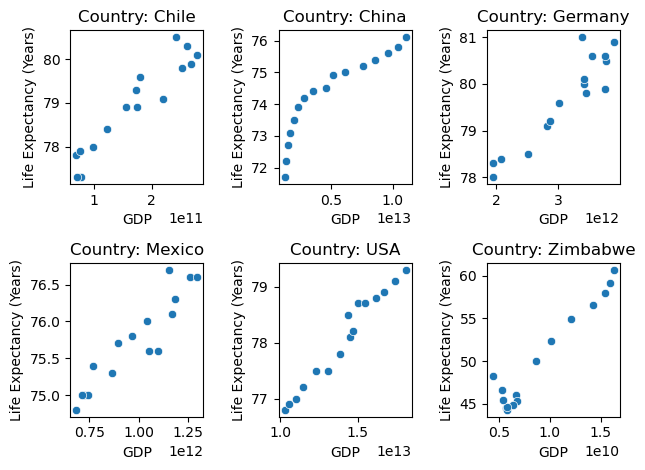

In [21]:
for i in range(1,7):
    country = countries[i-1]
    plt.subplot(2, 3, i)
    sns.scatterplot(data= df[df['Country'] == country], x= 'GDP', y='Life expectancy at birth (years)')
    plt.ylabel('Life Expectancy (Years)')
    if country == 'United States of America':
        c = 'USA'
    else:
        c = country
    plt.title(f'Country: {c}')
plt.tight_layout()
plt.show()

### Repeat with axes inverted.

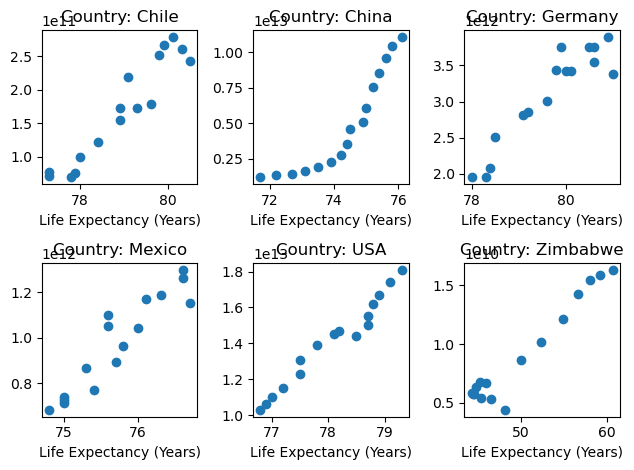

In [25]:
plt.clf()
for i in range(1,7):
    country = countries[i-1]
    plt.subplot(2, 3, i)
    #sns.scatterplot(data= df[df['Country'] == country], y= 'GDP', x='Life expectancy at birth (years)')
    plt.scatter(x=df[df['Country'] == country]['Life expectancy at birth (years)'], y = df[df['Country'] == country]['GDP'])
    plt.xlabel('Life Expectancy (Years)')
    if country == 'United States of America':
        c = 'USA'
    else:
        c = country
    plt.title(f'Country: {c}')
plt.tight_layout()
plt.show()

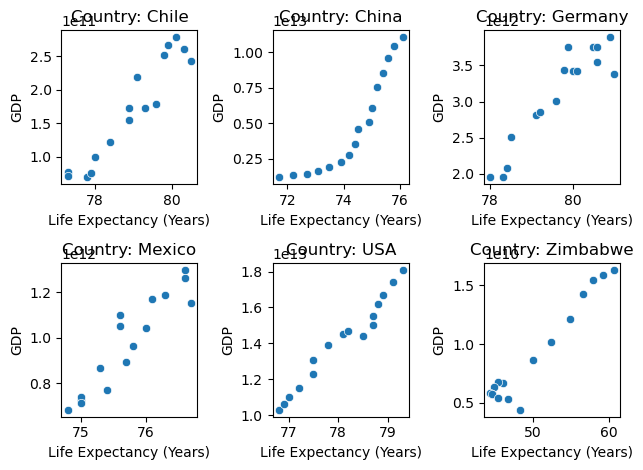

In [26]:
plt.clf()
for i in range(1,7):
    country = countries[i-1]
    plt.subplot(2, 3, i)
    sns.scatterplot(data= df[df['Country'] == country], y= 'GDP', x='Life expectancy at birth (years)')
    #plt.scatter(x=df[df['Country'] == country]['Life expectancy at birth (years)'], y = df[df['Country'] == country]['GDP'])
    plt.xlabel('Life Expectancy (Years)')
    if country == 'United States of America':
        c = 'USA'
    else:
        c = country
    plt.title(f'Country: {c}')
plt.tight_layout()
plt.show()